In [1]:
%matplotlib inline
import matplotlib.cm as cm
import random

# Import tree stuff:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier

import pandas as pd
import patsy as patsy
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# SMOTE
from imblearn.over_sampling import SMOTE

# Undersampling
from imblearn.under_sampling import RandomUnderSampler

# Import other models:
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

# Bagging:
from sklearn.ensemble import BaggingClassifier

# Searching hyperparameters and cross-validating
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn import metrics

import pickle

In [2]:
with open("x_liv.pkl", 'rb') as picklefile: 
    x_liv = pickle.load(picklefile)

with open("y_liv.pkl", 'rb') as picklefile: 
    y_liv = pickle.load(picklefile)

In [3]:
with open("y_train_liv.pkl", 'rb') as picklefile: 
    y_train_liv = pickle.load(picklefile)

with open("y_test_liv.pkl", 'rb') as picklefile: 
    y_test_liv = pickle.load(picklefile)

with open("x_train_liv.pkl", 'rb') as picklefile: 
    x_train_liv = pickle.load(picklefile)

with open("x_test_liv.pkl", 'rb') as picklefile: 
    x_test_liv = pickle.load(picklefile)

with open("x_train_scaled_liv.pkl", 'rb') as picklefile: 
    x_train_scaled_liv = pickle.load(picklefile)

with open("x_test_scaled_liv.pkl", 'rb') as picklefile: 
    x_test_scaled_liv = pickle.load(picklefile)
    
with open("x_scaled_liv.pkl", 'rb') as picklefile: 
    x_scaled_liv = pickle.load(picklefile)

with open("patientdataICD9_liv.pkl", 'rb') as picklefile: 
    patientdataICD9_liv = pickle.load(picklefile)

In [4]:
x_train = x_train_liv
y_train = y_train_liv
x_test = x_test_liv
y_test = y_test_liv
x = x_liv
y = y_liv

In [6]:
# pulling these in from pickle now

# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42, stratify=y)

In [4]:
def quick_test(model, X, y):
    xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3)
    model.fit(xtrain, ytrain)
    return model.score(xtest, ytest)

def quick_test_afew_times(model, X, y, n=10):
    return np.mean([quick_test(model, X, y) for j in range(n)])

#linearsvc = LinearSVC()
# Do the test 10 times with a LinearSVC and get the average score
#quick_test_afew_times(linearsvc, X, y1)

#### Decision tree and random forest:

In [5]:
decisiontree = DecisionTreeClassifier(max_depth=2)
quick_test_afew_times(decisiontree, x, y)

# using x train and x test with x that had been scaled before test-train split:
# 0.5664330167048804

0.5653226334752702

In [6]:
randomforest = RandomForestClassifier()
quick_test_afew_times(randomforest, x, y)

# using x train and x test with x that had been scaled before test-train split:
# 0.5488994431706519

0.5442875859810022

In [5]:
randomforest = RandomForestClassifier()
randomforest.fit(x_train, y_train)
randomforest.score(x_test, y_test)
y_pred = randomforest.predict(x_test)
print("Accuracy: %.3f"% metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

Accuracy: 0.538
             precision    recall  f1-score   support

        <30       0.24      0.07      0.10      2839
        >30       0.44      0.45      0.45      8887
         NO       0.61      0.70      0.65     13303

avg / total       0.51      0.54      0.52     25029



#### SMOTE:

In [6]:
sm = SMOTE(random_state=42)
x_train_smote, y_train_smote = sm.fit_sample(x_train, y_train)

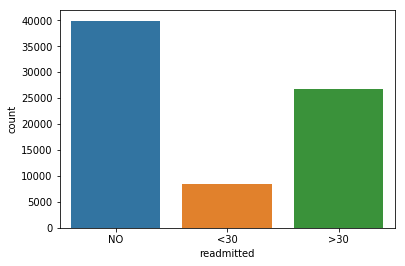

In [7]:
sns.countplot(y_train);

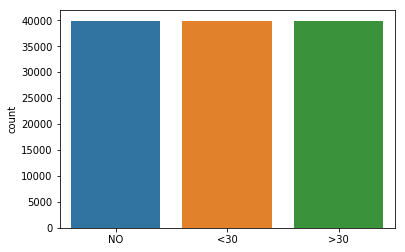

In [8]:
sns.countplot(y_train_smote);

In [9]:
randomforest = RandomForestClassifier()
randomforest.fit(x_train_smote, y_train_smote)
randomforest.score(x_test, y_test)
y_pred = randomforest.predict(x_test)
print("Accuracy: %.3f"% metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

Accuracy: 0.528
             precision    recall  f1-score   support

        <30       0.22      0.08      0.11      2839
        >30       0.44      0.44      0.44      8887
         NO       0.60      0.68      0.64     13303

avg / total       0.50      0.53      0.51     25029



#### Undersampling:

In [10]:
rus = RandomUnderSampler(random_state=0)
x_train_undersampled, y_train_undersampled = rus.fit_sample(x_train, y_train)

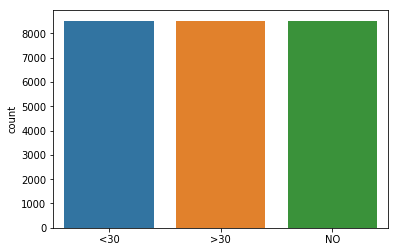

In [11]:
sns.countplot(y_train_undersampled);

In [12]:
randomforest = RandomForestClassifier(n_estimators=200)
randomforest.fit(x_train_undersampled, y_train_undersampled)
randomforest.score(x_test, y_test)
y_pred = randomforest.predict(x_test)
print("Accuracy: %.3f"% metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

Accuracy: 0.482
             precision    recall  f1-score   support

        <30       0.20      0.48      0.28      2839
        >30       0.46      0.37      0.41      8887
         NO       0.68      0.55      0.61     13303

avg / total       0.54      0.48      0.50     25029



In [13]:
randomforest = RandomForestClassifier(n_estimators=200, min_samples_split=10)
randomforest.fit(x_train_undersampled, y_train_undersampled)
randomforest.score(x_test, y_test)
y_pred = randomforest.predict(x_test)
print("Accuracy: %.3f"% metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

Accuracy: 0.493
             precision    recall  f1-score   support

        <30       0.20      0.47      0.28      2839
        >30       0.47      0.38      0.42      8887
         NO       0.68      0.57      0.62     13303

avg / total       0.55      0.49      0.51     25029



In [19]:
randomforest = RandomForestClassifier(n_estimators=200, min_samples_split=20)
randomforest.fit(x_train_undersampled, y_train_undersampled)
randomforest.score(x_test, y_test)
y_pred = randomforest.predict(x_test)
print("Accuracy: %.3f"% metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

Accuracy: 0.491
             precision    recall  f1-score   support

        <30       0.19      0.47      0.27      2839
        >30       0.46      0.37      0.41      8887
         NO       0.69      0.57      0.63     13716

avg / total       0.56      0.49      0.51     25442



In [18]:
randomforest = RandomForestClassifier(n_estimators=1000, min_samples_split=10)
randomforest.fit(x_train_undersampled, y_train_undersampled)
randomforest.score(x_test, y_test)
y_pred = randomforest.predict(x_test)
print("Accuracy: %.3f"% metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

Accuracy: 0.492
             precision    recall  f1-score   support

        <30       0.20      0.48      0.28      2839
        >30       0.46      0.38      0.42      8887
         NO       0.69      0.57      0.62     13716

avg / total       0.55      0.49      0.51     25442



In [8]:
# tune random forest hyperparameters
# try grid-search CV
# try ensembling with the RBF

#### Extra-random trees:

In [14]:
extraforest = ExtraTreesClassifier(n_estimators=200, min_samples_split=10)
extraforest.fit(x_train_undersampled, y_train_undersampled)
extraforest.score(x_test, y_test)
y_pred = extraforest.predict(x_test)
print("Accuracy: %.3f"% metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

Accuracy: 0.477
             precision    recall  f1-score   support

        <30       0.19      0.46      0.27      2839
        >30       0.46      0.40      0.43      8887
         NO       0.68      0.53      0.59     13303

avg / total       0.54      0.48      0.50     25029



In [23]:
extraforest = ExtraTreesClassifier(n_estimators=2000)
extraforest.fit(x_train_undersampled, y_train_undersampled)
extraforest.score(x_test, y_test)
y_pred = extraforest.predict(x_test)
print("Accuracy: %.3f"% metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

Accuracy: 0.464
             precision    recall  f1-score   support

        <30       0.18      0.46      0.26      2839
        >30       0.44      0.41      0.42      8887
         NO       0.68      0.50      0.58     13716

avg / total       0.54      0.46      0.49     25442



In [ ]:
for n_estimator in range(100, 2000, 100):
    extraforest = ExtraTreesClassifier(n_estimators=n_estimator)
    extraforest.fit(x_train_undersampled, y_train_undersampled)
    extraforest.score(x_test, y_test)
    y_pred = extraforest.predict(x_test)
    print("Number of estimators: %.3f"% n_estimator)
    print("Accuracy: %.3f"% metrics.accuracy_score(y_test, y_pred))
    print(metrics.classification_report(y_test, y_pred))

#### Boosted trees:

In [15]:
# boosted no resampling

boostforest = AdaBoostClassifier(n_estimators=200)
boostforest.fit(x_train, y_train)
boostforest.score(x_test, y_test)
y_pred = boostforest.predict(x_test)
print("Accuracy: %.3f"% metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

Accuracy: 0.578
             precision    recall  f1-score   support

        <30       0.36      0.03      0.06      2839
        >30       0.50      0.37      0.42      8887
         NO       0.61      0.84      0.70     13303

avg / total       0.54      0.58      0.53     25029



In [16]:
# boosted undersampled

boostforest = AdaBoostClassifier(n_estimators=200)
boostforest.fit(x_train_undersampled, y_train_undersampled)
boostforest.score(x_test, y_test)
y_pred = boostforest.predict(x_test)
print("Accuracy: %.3f"% metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

Accuracy: 0.498
             precision    recall  f1-score   support

        <30       0.20      0.39      0.27      2839
        >30       0.46      0.40      0.43      8887
         NO       0.67      0.59      0.62     13303

avg / total       0.54      0.50      0.51     25029



In [21]:
# boosted undersampled

boostforest = AdaBoostClassifier(n_estimators=2000)
boostforest.fit(x_train_undersampled, y_train_undersampled)
boostforest.score(x_test, y_test)
y_pred = boostforest.predict(x_test)
print("Accuracy: %.3f"% metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

Accuracy: 0.496
             precision    recall  f1-score   support

        <30       0.20      0.42      0.27      2839
        >30       0.45      0.41      0.43      8887
         NO       0.68      0.57      0.62     13716

avg / total       0.55      0.50      0.51     25442



In [17]:
# boosted SMOTE

boostforest = AdaBoostClassifier(n_estimators=200)
boostforest.fit(x_train_smote, y_train_smote)
boostforest.score(x_test, y_test)
y_pred = boostforest.predict(x_test)
print("Accuracy: %.3f"% metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

Accuracy: 0.581
             precision    recall  f1-score   support

        <30       0.35      0.04      0.07      2839
        >30       0.49      0.43      0.45      8887
         NO       0.63      0.80      0.70     13716

avg / total       0.55      0.58      0.54     25442



#### Randomized grid search:

In [4]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()

# Random search of parameters

# using x-num fold cross validation
cv_num = 3

# search across 100 different combinations
n_iter_num = 20

# and use all available cores

rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                               n_iter=n_iter_num, cv=cv_num, verbose=2, random_state=42, n_jobs=-1)

# Fit the random search model
rf_random.fit(x_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=50, bootstrap=True 
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=50, bootstrap=True 
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=50, bootstrap=True 
[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=90, bootstrap=False 
[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=90, bootstrap=False 
[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=90, bootstrap=False 
[CV] n_estimators=600, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=60, bootstrap=False 
[CV] n_estimators=600, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=60, bootstrap=False 
[CV]  n_estimators=200, 

[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed: 26.4min


[CV]  n_estimators=400, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=20, bootstrap=False, total= 2.8min
[CV] n_estimators=800, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=20, bootstrap=False 
[CV]  n_estimators=2000, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=50, bootstrap=True, total=11.9min
[CV] n_estimators=800, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=20, bootstrap=False 
[CV]  n_estimators=400, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=20, bootstrap=False, total= 2.7min
[CV] n_estimators=800, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=20, bootstrap=False 
[CV]  n_estimators=2000, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=50, bootstrap=True, total=11.9min
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=70, bootstrap=True 
[CV]  n_estimators=2000, m

In [ ]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

In [ ]:
# How does the baseline/benchmark model perform?
base_model = RandomForestClassifier(n_estimators = 10, random_state = 42)
base_model.fit(train_features, train_labels)
base_accuracy = evaluate(base_model, test_features, test_labels)

In [ ]:
# How does the new model perform?
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, test_features, test_labels)

In [ ]:
# How much did we improve?
print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

In [20]:
randomforest = RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=70, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=1200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

randomforest.fit(x_train, y_train)
randomforest.score(x_test, y_test)
y_pred = randomforest.predict(x_test)
print("Accuracy: %.3f"% metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

Accuracy: 0.591
             precision    recall  f1-score   support

        <30       0.70      0.01      0.02      2839
        >30       0.52      0.36      0.43      8887
         NO       0.61      0.86      0.72     13716

avg / total       0.59      0.59      0.54     25442



In [ ]:
randomforest = RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=70, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=1200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

randomforest.fit(x_train, y_train)
randomforest.score(x_test, y_test)
y_pred = randomforest.predict(x_test)
print("Accuracy: %.3f"% metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))